# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [3]:
def get_data():
    #retrieves data from assigned csv file, returns min and max per day of the year and all of 2015
    data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    data.sort_values('Date', inplace=True)
    current = data[data['Date']>'2015']
    current = current.groupby('Date')['Data_Value'].agg({'min': min, 'max':max})
    current.index = (pd.to_datetime(current.index))
    data = data[data['Date']<'2015']
    data['Date'] = data['Date'].apply(lambda x: '2015-' + '-'.join(x.split('-')[1:]))
    minmax = data.groupby('Date')['Data_Value'].agg({'min': min, 'max':max})
    minmax.drop('2015-02-29', inplace=True) #Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
    minmax.index = (pd.to_datetime(minmax.index))
    return minmax, current

get_data()

(            max  min
 Date                
 2015-01-01  156 -160
 2015-01-02  139 -267
 2015-01-03  133 -267
 2015-01-04  106 -261
 2015-01-05  128 -150
 2015-01-06  189 -266
 2015-01-07  217 -306
 2015-01-08  194 -294
 2015-01-09  178 -278
 2015-01-10  100 -256
 2015-01-11  156 -183
 2015-01-12  161 -193
 2015-01-13  167 -250
 2015-01-14  150 -266
 2015-01-15   67 -272
 2015-01-16   94 -294
 2015-01-17  133 -294
 2015-01-18  122 -289
 2015-01-19  106 -300
 2015-01-20  133 -239
 2015-01-21  133 -260
 2015-01-22  117 -277
 2015-01-23  128 -250
 2015-01-24  117 -267
 2015-01-25  100 -243
 2015-01-26   89 -238
 2015-01-27   78 -239
 2015-01-28  122 -294
 2015-01-29  178 -278
 2015-01-30  183 -233
 ...         ...  ...
 2015-12-02  156 -133
 2015-12-03  183 -100
 2015-12-04  183 -122
 2015-12-05  172 -155
 2015-12-06  128 -183
 2015-12-07   83 -194
 2015-12-08   72 -200
 2015-12-09   83 -189
 2015-12-10  111 -172
 2015-12-11  128 -167
 2015-12-12  133 -210
 2015-12-13  111 -178
 2015-12-1

<IPython.core.display.Javascript object>


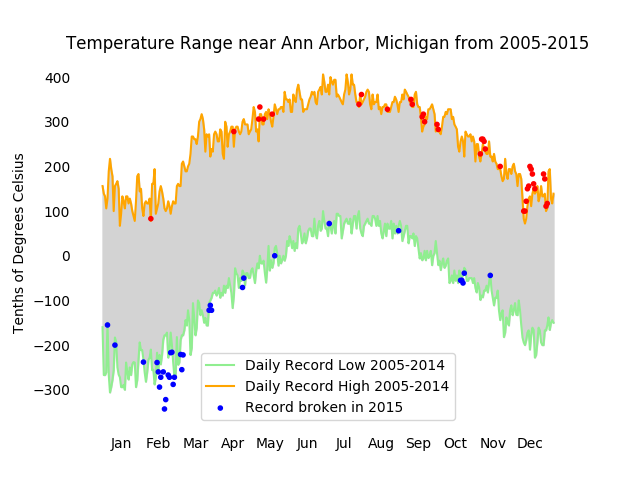

In [23]:
def line_graph():
    minmax, cur = get_data()
    records = []
    for i in minmax.index:
        if (cur.loc[i]['min'] < minmax.loc[i]['min']):
            records.append([i, cur.loc[i]['min'], 'blue'])
        elif (cur.loc[i]['max'] > minmax.loc[i]['max']):
            records.append([i, cur.loc[i]['max'], 'red'])
    records = list(zip(*records))
    plt.figure()
    mins = plt.plot(minmax['min'], '-', c='lightgreen', label='Daily Record Low 2005-2014') #a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
    maxs = plt.plot(minmax['max'], '-', c='orange', label='Daily Record High 2005-2014')
    plt.gca().fill_between(minmax.index, minmax['min'], minmax['max'], color='lightgrey')
    rec = plt.scatter(records[0], records[1], marker='.', c=records[2], zorder=10, label='Record broken in 2015') #Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
    
    #Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.
    #xlabels = minmax.index.map(lambda x: ('-'.join(str(x).split('-')[1:])).split(' ')[0])
    #plt.xticks(minmax.index[15::30], xlabels[15::30])
    plt.xticks(minmax.index[15::30], calendar.month_abbr[1:])
    plt.ylabel('Tenths of Degrees Celsius')
    plt.title('Temperature Range near Ann Arbor, Michigan from 2005-2015')
    plt.legend()
    for spine in plt.gca().spines.values(): #removes the frame
        spine.set_visible(False)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on') #removes the ticks
    plt.show()
    #plt.savefig('Assignment2test.png')
line_graph()